In [5]:
import tensorflow as tf
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from keras.initializers import glorot_uniform
import os

In [6]:
dir_pickle = "database_serilased"
dir_models_save = "models"
person = "001"

In [7]:
pickle_in = open(os.path.join(dir_pickle,person,f"X{person}Test.pickle"),"rb")
Xtest = pickle.load(pickle_in)
pickle_in.close()
pickle_in = open(os.path.join(dir_pickle,person,f"y{person}Test.pickle"),"rb")
ytest = pickle.load(pickle_in)
pickle_in.close()

In [8]:
from tensorflow.keras.models import load_model
from keras.initializers import glorot_uniform
custom_objects={'GlorotUniform': glorot_uniform()}
saved_model = load_model(os.path.join(dir_models_save,f"001#Face_spoofing300x2_04102019_1836.h5"),custom_objects)
saved_model.evaluate(Xtest,ytest)

959/959 [==============================] - 10s 10ms/sample - loss: 1.1115 - acc: 0.9969


[1.1114779034706184, 0.99687177]

In [9]:
a = saved_model.predict(Xtest)
len(a)

959

435.0


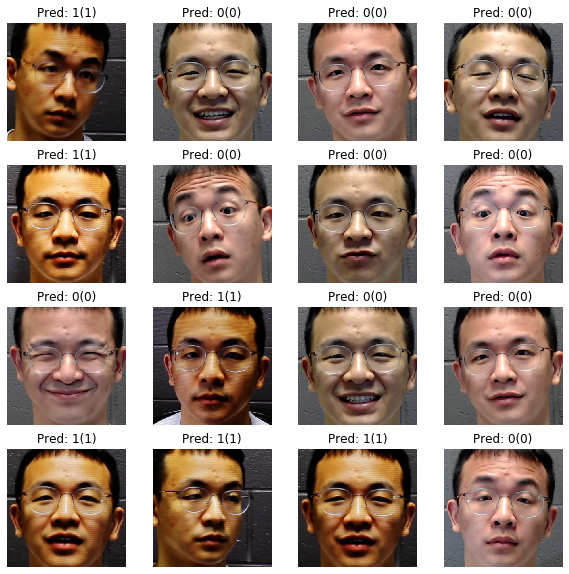

In [13]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

plt.figure(figsize=(10,10))
a_round = np.round(a)
print(np.sum(a_round))
nrows = 4
ncols = 4
start = 4
Xtest_sample = Xtest[start:start +nrows*ncols]
i = start
for img in Xtest_sample:
    plt.subplot(nrows,ncols,i-start+1)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Pred: {int(a_round[i])}({ytest[i]})")
    i += 1
